## 다항회귀 적용

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# 데이터 로드
housing = fetch_california_housing()
X = housing.data[:, [0]]  # MedInc (중간 소득)
y = housing.target        # House Value

In [13]:
import pandas as pd

df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['label'] = housing.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,label
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=25)

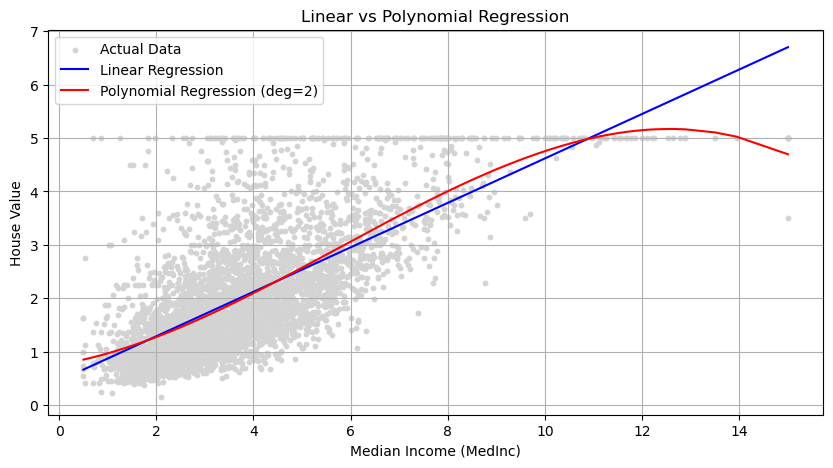

선형 회귀 MSE: 0.7052
다항 회귀 MSE: 0.6880


In [27]:
# 데이터 정렬 (시각화를 위한 정렬)
sorted_idx = X_test[:, 0].argsort()
X_test = X_test[sorted_idx]
y_test = y_test[sorted_idx]

# -----------------------------
# 1. 선형 회귀
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# -----------------------------
# 2. 다항 회귀
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

X_poly = poly.fit_transform(X_test)
y_pred_poly = poly_reg.predict(X_poly)

# -----------------------------
# 3. 결과 시각화
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='lightgray', label='Actual Data', s=10)
plt.plot(X_test, y_pred_lin, color='blue', label='Linear Regression')
plt.plot(X_test, y_pred_poly, color='red', label='Polynomial Regression (deg=2)')
plt.xlabel('Median Income (MedInc)')
plt.ylabel('House Value')
plt.title('Linear vs Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 4. 성능 비교 (MSE)
mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_poly = mean_squared_error(y_test, y_pred_poly)

print(f"선형 회귀 MSE: {mse_lin:.4f}")
print(f"다항 회귀 MSE: {mse_poly:.4f}")

In [28]:
example = [[2], [3], [5]]

poly = PolynomialFeatures(degree=2, include_bias=False)
example_poly = poly.fit_transform(example)
example_poly

array([[ 2.,  4.],
       [ 3.,  9.],
       [ 5., 25.]])

## K-Fold

In [34]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

scores = 0

for train_idx, val_idx in kfold.split(X_train):
    x_train, x_val = X_train[train_idx], X_train[val_idx]
    y_train_, y_val = y_train[train_idx], y_train[val_idx]

    model = LinearRegression()

    model.fit(x_train, y_train_)
    score = model.score(x_val, y_val)
    print(score)
    scores += score

print("final score :", scores / 5)

0.4687954557328966
0.45702218452008136
0.46044449293735157
0.501795332483038
0.4757971461161141
final score : 0.4727709223578963


## 정규화 모델

In [47]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# L1 정규화
lasso_reg = Lasso(alpha=10)
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred)

# L2 정규화
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred)

# L1 + L2 정규화
elastic_reg = ElasticNet(alpha=0.001, l1_ratio=0.001)
elastic_reg.fit(X_train, y_train)
y_pred = elastic_reg.predict(X_test)
mse_elastic = mean_squared_error(y_test, y_pred)

print(f"선형 회귀 MSE: {mse_lin:.4f}")
print(f"lasso 회귀 MSE: {mse_lasso:.4f}")
print(f"ridge 회귀 MSE: {mse_ridge:.4f}")
print(f"elastic 회귀 MSE: {mse_elastic:.4f}")

선형 회귀 MSE: 0.7052
lasso 회귀 MSE: 1.3423
ridge 회귀 MSE: 0.7052
elastic 회귀 MSE: 0.7053


## 손실 함수

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 데이터 로드
housing = fetch_california_housing()
X = housing.data[:, [0]]  # MedInc (중간 소득)
y = housing.target        # House Value

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=25)

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r_squared = r2_score(y_test, pred)

print("MSE :", mse)
print("MAE :", mae)
print("R2 :", r_squared)

MSE : 0.6850623412578433
MAE : 0.6143308376164669
R2 : 0.47055495599656894
